Stock Market Prediction And Forecasting Using Stacked LSTM

# Import the libraries

In [5]:
### importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Data Collection

In [1]:
# Data Collection

# I have used my API_Key but I am not sharing my API_Key
# API_key=my_api
import pandas_datareader as pdr
API_key="write your key"

In [30]:


# getting  data from tingo using api key
apple= pdr.get_data_tiingo('AAPL', api_key=API_key)
apple.head()

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-02-07 00:00:00+00:00  159.54  163.40  159.07  163.09  50852130   
       2018-02-08 00:00:00+00:00  155.15  161.00  155.03  160.29  49594129   
       2018-02-09 00:00:00+00:00  156.41  157.89  150.24  157.07  66723743   
       2018-02-12 00:00:00+00:00  162.71  163.89  157.51  158.50  60560145   
       2018-02-13 00:00:00+00:00  164.34  164.75  161.65  161.95  32104756   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-02-07 00:00:00+00:00  37.877001  38.793419  37.765417  38.719820   
       2018-02-08 00:00:00+00:00  36.834755  38.223626  36.806265  38.055062   
       2018-02-09 00:00:00+00:00  37.283467  37.636255  35.812723  37.440791   
       2018-02-12 00:00:00+00:00  38.785198  39.066475  37.545674  37.781660   
       2018-02-13 00:00:00+00:00  39.173742  39.271473  38.532526  38.604037   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-02-07 00:00:00+00:00  203408520     0.00          1.0  
       2018-02-08 00:00:00+00:00  198376516     0.00          1.0  
       2018-02-09 00:00:00+00:00  266894972     0.63          1.0  
       2018-02-12 00:00:00+00:00  242240580     0.00          1.0  
       2018-02-13 00:00:00+00:00  128419024     0.00          1.0

In [31]:
apple.tail()

close    high     low     open     volume  \
symbol date                                                                    
AAPL   2023-01-30 00:00:00+00:00  143.00  145.55  142.85  144.955   64015274   
       2023-01-31 00:00:00+00:00  144.29  144.34  142.28  142.700   65874459   
       2023-02-01 00:00:00+00:00  145.43  146.61  141.32  143.970   77663633   
       2023-02-02 00:00:00+00:00  150.82  151.18  148.17  148.900  118338980   
       2023-02-03 00:00:00+00:00  154.50  157.38  147.83  148.030  154357337   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2023-01-30 00:00:00+00:00    143.00   145.55  142.85  144.955   
       2023-01-31 00:00:00+00:00    144.29   144.34  142.28  142.700   
       2023-02-01 00:00:00+00:00    145.43   146.61  141.32  143.970   
       2023-02-02 00:00:00+00:00    150.82   151.18  148.17  148.900   
       2023-02-03 00:00:00+00:00    154.50   157.38  147.83  148.030   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-01-30 00:00:00+00:00   64015274      0.0          1.0  
       2023-01-31 00:00:00+00:00   65874459      0.0          1.0  
       2023-02-01 00:00:00+00:00   77663633      0.0          1.0  
       2023-02-02 00:00:00+00:00  118338980      0.0          1.0  
       2023-02-03 00:00:00+00:00  154357337      0.0          1.0

In [32]:
# reading the data till 2022

apple=apple.loc['AAPL'].loc[:'2020-02-02 00:00:00+00:00']

In [33]:
# saving this data in csv format
file_name='/content/drive/MyDrive/apple.csv'
apple.to_csv(open(file_name,'w'))

In [34]:
df=pd.read_csv('/content/drive/MyDrive/apple.csv')

In [35]:
# extracting out the date only
df['date']=df['date'].str.split().str[0]

In [36]:
df1=df.reset_index()['close']

# Visualization

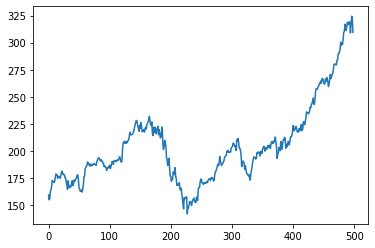

In [37]:

plt.plot(df1)

# LSTM
- LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [38]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

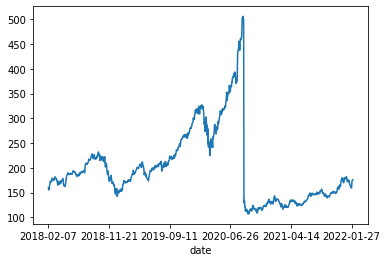

In [25]:
df['close'].plot()

In [39]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [40]:
training_size,test_size

(324, 175)

In [41]:
train_data

array([[0.09525117],
       [0.07115015],
       [0.07806753],
       [0.11265441],
       [0.12160307],
       [0.13823772],
       [0.16909141],
       [0.16601702],
       [0.16283283],
       [0.15855065],
       [0.16640132],
       [0.18287126],
       [0.20192149],
       [0.1987373 ],
       [0.19725501],
       [0.18012627],
       [0.18676915],
       [0.19011803],
       [0.18929454],
       [0.18029097],
       [0.19077683],
       [0.20746637],
       [0.21701894],
       [0.20741147],
       [0.1990118 ],
       [0.2001647 ],
       [0.19670601],
       [0.18177326],
       [0.18144386],
       [0.15964864],
       [0.14636289],
       [0.12489706],
       [0.16788361],
       [0.143563  ],
       [0.13335163],
       [0.14048861],
       [0.13444963],
       [0.1438375 ],
       [0.16151523],
       [0.16804831],
       [0.1437826 ],
       [0.15295086],
       [0.1705188 ],
       [0.16607192],
       [0.17540489],
       [0.17864397],
       [0.18462805],
       [0.197

In [42]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [43]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [45]:
print(X_train.shape), print(y_train.shape)


(223, 100)
(223,)


(None, None)

In [46]:
print(X_test.shape), print(ytest.shape)

(74, 100)
(74,)


(None, None)

In [47]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Model Building

In [49]:
# Building the model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [50]:

# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
# train the model

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 10s 352ms/step - loss: 0.0516 - val_loss: 0.0434
Epoch 2/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0136 - val_loss: 0.0400
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0073 - val_loss: 0.1248
Epoch 4/100
4/4 [==============================] - 0s 30ms/step - loss: 0.0093 - val_loss: 0.0963
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0061 - val_loss: 0.0427
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0062 - val_loss: 0.0407
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0052 - val_loss: 0.0666
Epoch 8/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0051 - val_loss: 0.0604
Epoch 9/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0045 - val_loss: 0.0321
Epoch 10/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0042 - val_loss: 0.0273
Epoch 11/100
4/4 

## Prediction

In [52]:
### Lets Do the prediction 
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 9ms/step


In [53]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Performance 

In [54]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

195.04784884990778

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

279.95504162469507

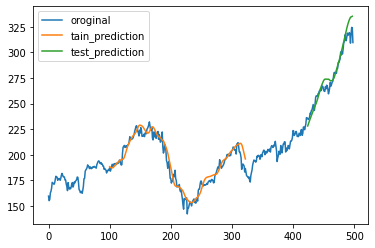

In [60]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label='oroginal')
plt.plot(trainPredictPlot,label='tain_prediction')
plt.plot(testPredictPlot,label='test_prediction')

plt.legend()